## CS405

# Final Exam - DBSCAN


(500, 2)


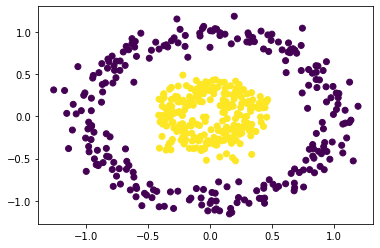

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
from sklearn.utils import shuffle

# Let's generate a scatter plot composed of two circles
# The cloud contains 500 observations (`n_samples`) noisy by
# a Gaussian noise of standard deviation 0.1 (`noise`).
# The ratio between the radius of the small circle and the large circle
# is 0.3 (`factor`).
data, labels = sklearn.datasets.make_circles(n_samples=500, noise=0.1, factor=0.3, random_state=0)

print(data.shape)
# Random permutation of the rows of the matrix (the observations are mixed)
data, labels = shuffle(data, labels)

# Point cloud display
plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()

### Question 2 code

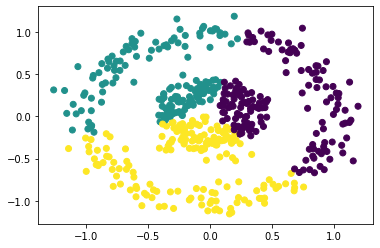

In [53]:
from sklearn.cluster import KMeans
kMeans = KMeans(n_clusters=3)
labels = kMeans.fit_predict(data)

plt.scatter(data[:,0], data[:,1], c=labels) and plt.show()

In [54]:
from sklearn.cluster import DBSCAN

db = DBSCAN()

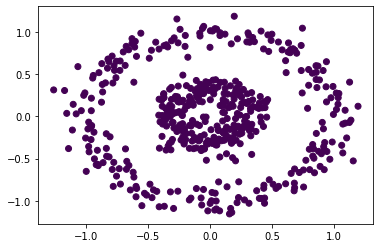

In [55]:
predictions = db.fit_predict(data)
# equivalent to
# db.fit(data)
# predictions = db.labels_

# Display of the scatter plot colored by the predictions
plt.scatter(data[:,0], data[:,1], c=predictions)
plt.show()

In [56]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=4).fit(data)
distances, _ = nn.kneighbors(data)

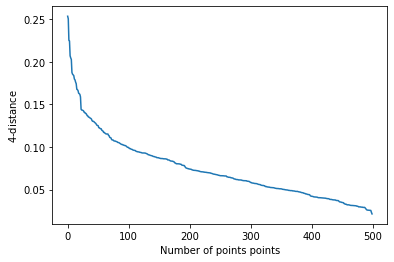

In [57]:
distances_triees = np.sort(distances[:,-1])[::-1]
plt.plot(distances_triees)
plt.xlabel("Number of points points")
plt.ylabel("$4$-distance")
plt.show()

### Question 6

[]

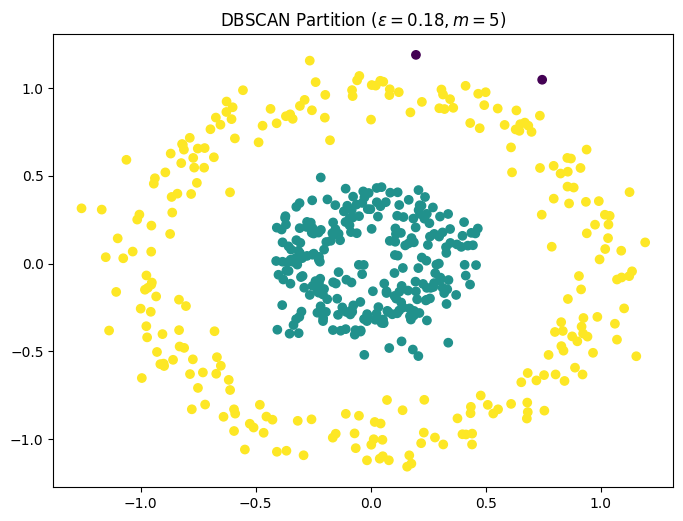

In [58]:
dbs = DBSCAN(eps=0.18, min_samples=5)
predictions = dbs.fit_predict(data)

fig = plt.figure(figsize=(8,6), dpi= 100)
plt.scatter(data[:,0], data[:,1], c=predictions)
plt.title("DBSCAN Partition ($\\varepsilon=0.18, m=5$)")
plt.plot()

# Iris dataset questions

In [59]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

In [60]:
# question 8 code

print(X.shape)

(150, 4)


In [61]:
min_, max_ = X.min(axis=0), X.max(axis=0)
noise = np.random.rand(20, 4) * (max_ - min_) + min_
X = np.concatenate((X, noise))
y = np.concatenate((y, -1 * np.ones(20, dtype=int)))

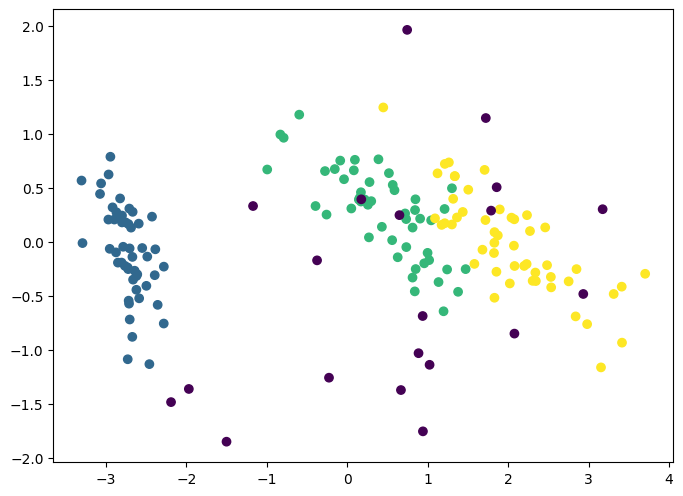

In [62]:
# Question 9 code provided

from sklearn.decomposition import PCA
fig = plt.figure(figsize=(8,6), dpi= 100)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y) and plt.show()

### Question 10

[]

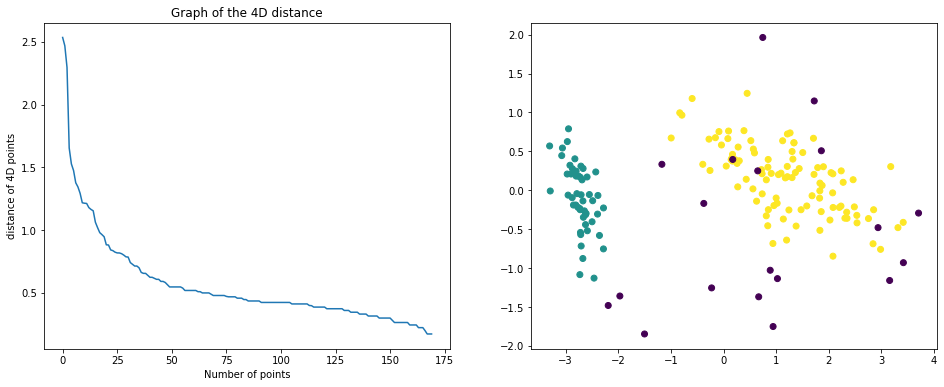

In [67]:
from sklearn.cluster import DBSCAN

neighbors = NearestNeighbors(n_neighbors=7)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

dbScan = DBSCAN(eps=0.8, min_samples=8)
labels = dbScan.fit_predict(X)

#print(np.unique(labels))

fig = plt.figure(figsize=(16, 6))
fig.add_subplot(121)
plt.plot(-np.sort(-distances[:,-1]))
plt.xlabel("Number of points")
plt.ylabel("distance of 4D points")
plt.title("Graph of the 4D distance")
fig.add_subplot(122)
plt.scatter(x=X_pca[:,0], y=X_pca[:,1], c=labels)
plt.plot()

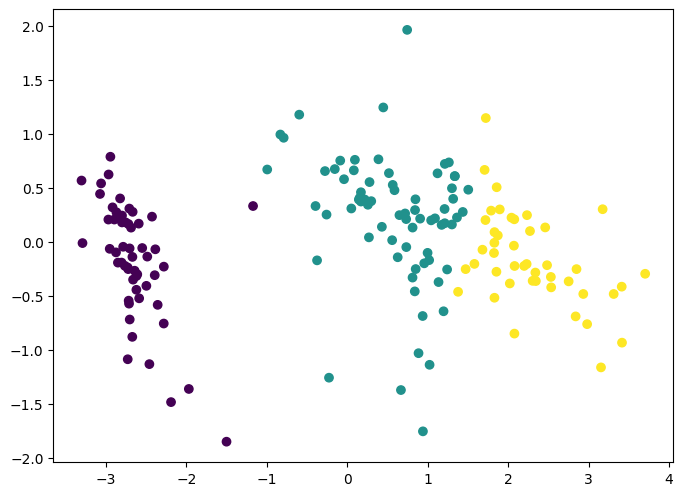

In [66]:
kMean = KMeans(n_clusters=3)
labels = kMean.fit_predict(X)
fig = plt.figure(figsize=(8,6), dpi= 100)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels) and plt.show()

### Question 11

In [65]:
from sklearn.metrics import accuracy_score
import numpy as np

predicted_outliers = db.labels_
predicted_outliers[db.labels_ > 0] = 0
predicted_outliers.sort()
arr = np.array(predicted_outliers)
true_outliers = y
true_outliers[y > 0] = 0


print(accuracy_score(true_outliers, arr[:170]))

0.8823529411764706
